In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [29]:
def get_data(file_up):
    df = pd.read_csv(file_up)
    labels = df.iloc[:, 0]
    data = df.iloc[:, 1:]
    labels = labels.values
    ret_data = np.zeros(shape = (len(data), 28,28))
    for index, row in data.iterrows(): 
        temp = row.values
        temp = np.array_split(temp, 28)
        ret_data[index] = np.asarray(temp, dtype = 'float64')    
    return ret_data, labels

In [34]:
training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)
print(type(testing_images[0][0][0]))

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)
<class 'numpy.float64'>


In [35]:
training_images = np.expand_dims(training_images, axis = 3)
print(training_images.shape)

testing_images = np.expand_dims(testing_images, axis = 3)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [36]:
train_datagen = ImageDataGenerator(rescale = 1/255, 
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  rotation_range = 90,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2)

validation_datagen = ImageDataGenerator(rescale = 1/255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [47]:
train_generator = train_datagen.flow(training_images, training_labels, batch_size = 32)
validation_generator = validation_datagen.flow(testing_images, testing_labels, batch_size = 32)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(26, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=len(training_images) / 32,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=len(testing_images) / 32)

model.evaluate(testing_images, testing_labels)

Epoch 1/20
858/858 [==============================] - 30s 35ms/step - loss: 2.7735 - acc: 0.1516 - val_loss: 2.0747 - val_acc: 0.3098
Epoch 2/20
858/858 [==============================] - 30s 34ms/step - loss: 2.0280 - acc: 0.3507 - val_loss: 1.4224 - val_acc: 0.4980
Epoch 3/20
858/858 [==============================] - 31s 36ms/step - loss: 1.5451 - acc: 0.4951 - val_loss: 1.0429 - val_acc: 0.6442
Epoch 4/20
858/858 [==============================] - 32s 37ms/step - loss: 1.2673 - acc: 0.5805 - val_loss: 0.9304 - val_acc: 0.6937
Epoch 5/20
858/858 [==============================] - 33s 38ms/step - loss: 1.0919 - acc: 0.6339 - val_loss: 0.7856 - val_acc: 0.7368
Epoch 6/20
858/858 [==============================] - 29s 33ms/step - loss: 0.9728 - acc: 0.6762 - val_loss: 0.5820 - val_acc: 0.8056
Epoch 7/20
858/858 [==============================] - 31s 36ms/step - loss: 0.8622 - acc: 0.7141 - val_loss: 0.4875 - val_acc: 0.8173
Epoch 8/20
858/858 [==============================] - 29s 34ms

[4.719234323209049, 0.7042666]

Populating the interactive namespace from numpy and matplotlib


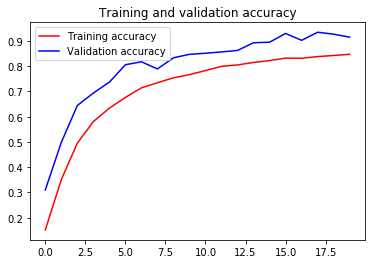

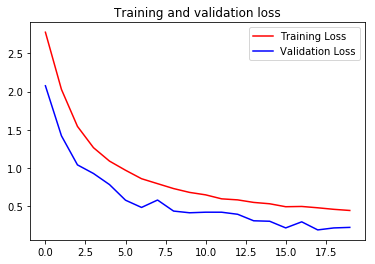

In [49]:
%pylab inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
model.save('sign_language_classify.h5')